# The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

In [6]:
import pandas as pd
df = pd.read_csv("Flight_Booking.csv")

In [4]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df = df.drop(columns = ["Unnamed: 0"])

In [6]:
df.shape

(300153, 11)

In [7]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

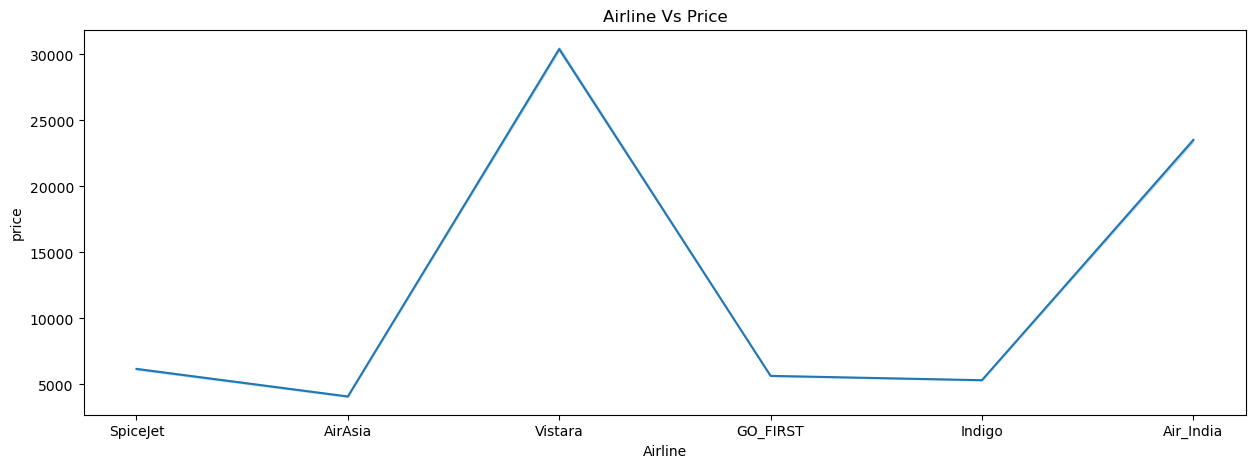

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title("Airline Vs Price")
plt.xlabel("Airline")
plt.ylabel("price")
plt.show()


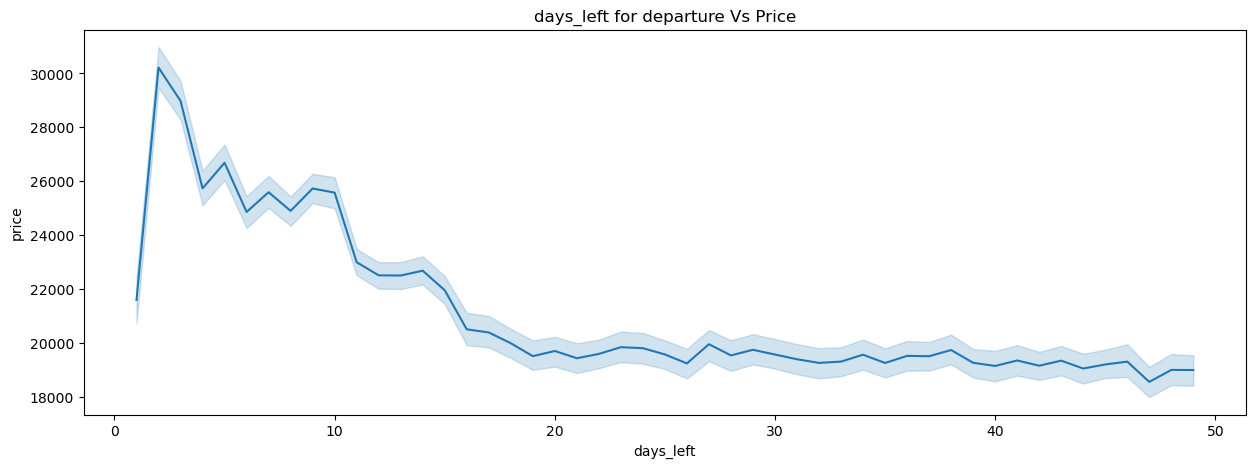

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(x = df['days_left'], y = df['price'])
plt.title("days_left for departure Vs Price")
plt.xlabel("days_left")
plt.ylabel("price")
plt.show()

In [11]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


<AxesSubplot:xlabel='airline', ylabel='price'>

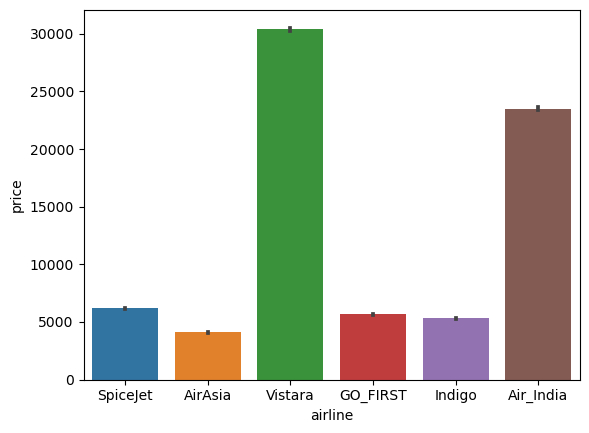

In [12]:
sns.barplot(x = df['airline'], y = df['price'])

<AxesSubplot:xlabel='class', ylabel='price'>

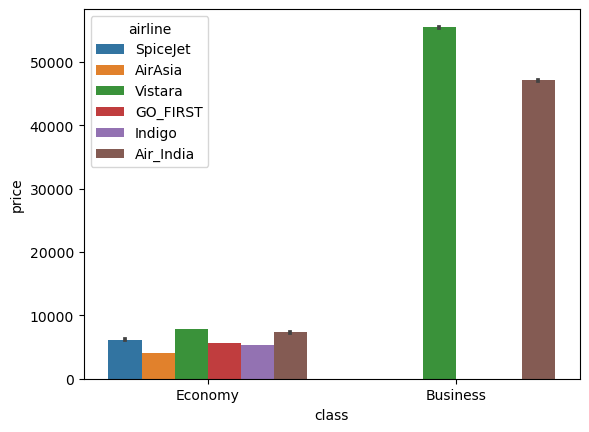

In [7]:
sns.barplot(x = df['class'], y = df['price'], hue = df['airline'])

In [ ]:
sns.lineplot(x = df['days_left'], y = df['price'], hue = df['destination_city'])
sns.lineplot(x = df['days_left'], y = df['price'], hue = df['source_city'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df

In [ ]:
df['airline']= le.fit_transform (df['airline'])
df['source_city']= le.fit_transform (df['source_city'])
df['departure_time']= le.fit_transform (df['departure_time'])
df['stops']= le.fit_transform (df['stops'])
df['arival_time']= le.fit_transform (df['arival_time'])
df['destination_city']= le.fit_transform (df['destination_city'])
df['class']= le.fit_transform (df['class'])
df.info()


In [ ]:
plt.figure(figsize= (10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype!='object')& (col != 'price')):
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [ variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
print (vif_data)

In [ ]:
df = df.drop(columns =["stops"])
df

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype!='object')& (col != 'price')):
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [ variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
print (vif_data)

In [ ]:

x = df.drop(columns = ["price"])
y = df["price"]

In [ ]:
x,y

In [ ]:
df.info()

In [ ]:

from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [ ]:
x_train, y_train, y_test, x_test

In [ ]:
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
r2_score  (y_pred, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [ ]:
r2_score = (y_pred, y_test)